In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import concurrent.futures


In [9]:
df = pd.DataFrame({'date': pd.Series(dtype='object'),
                   'id_station': pd.Series(dtype='str'),
                   'value_CO': pd.Series(dtype='float'),
                   'value_NO': pd.Series(dtype='float'),
                   'value_NO2': pd.Series(dtype='float'),
                   'value_NOX': pd.Series(dtype='float'),
                   'value_PM10': pd.Series(dtype='float'),
                   'value_PM2.5': pd.Series(dtype='float'),
                   'value_PMCO': pd.Series(dtype='float'),
                   'value_SO2': pd.Series(dtype='float'),
                   'value_RH': pd.Series(dtype='float'),
                   'value_TMP': pd.Series(dtype='float'),
                   'value_WDR': pd.Series(dtype='float'),
                   'value_WSP': pd.Series(dtype='float'),
                   })

In [11]:
poll_var_df = pd.DataFrame({'date': pd.Series(dtype='object'),
                   'id_station': pd.Series(dtype='str'),
                   'value_CO': pd.Series(dtype='float'),
                   'value_NO': pd.Series(dtype='float'),
                   'value_NO2': pd.Series(dtype='float'),
                   'value_NOX': pd.Series(dtype='float'),
                   'value_PM10': pd.Series(dtype='float'),
                   'value_PM2.5': pd.Series(dtype='float'),
                   'value_PMCO': pd.Series(dtype='float'),
                   'value_SO2': pd.Series(dtype='float'),})

In [12]:
met_var_df = pd.DataFrame({'value_RH': pd.Series(dtype='float'),
                   'value_TMP': pd.Series(dtype='float'),
                   'value_WDR': pd.Series(dtype='float'),
                   'value_WSP': pd.Series(dtype='float'),
                   })

In [23]:
def process_data(year, filename_prefix):
    file_path = f"data/{filename_prefix}_{year}.csv"
    temp_df = pd.read_csv(file_path, skiprows=10)

    for i in range(1, 25):
        time = f"{str(i-1).zfill(2)}:00:00"
        temp_df['date'] = temp_df['date'].replace(to_replace=f"{str(i).zfill(2)}:00", value=time, regex=True)

    temp_df.drop(['unit'], axis=1, inplace=True)
    p_table = pd.pivot_table(temp_df, columns=['id_parameter'], values=['value'], index=['date', 'id_station'])
    p_table.columns = ['_'.join(str(s).strip() for s in col if s) for col in p_table.columns]
    temp_df2 = p_table.reset_index()
    return temp_df2



In [24]:
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    poll_results = [executor.submit(process_data, year, "contaminantes") for year in range(2017, 2023)]
    met_results = [executor.submit(process_data, year, "meteorología") for year in range(2017, 2023)]

    for future in concurrent.futures.as_completed(poll_results):
        poll_var_df = pd.concat([poll_var_df, future.result()], axis=0)

    for future in concurrent.futures.as_completed(met_results):
        met_var_df = pd.concat([met_var_df, future.result()], axis=0)

In [18]:
for i in range (2017,2023):
  temp_df = pd.read_csv(f"data/contaminantes_{i}.csv",skiprows=10)
  for i in range(1,10):
    temp_df['date'] = temp_df['date'].replace(to_replace = "0"+str(i)+":00",value = "0"+str(i-1)+":00:00",regex=True)
  for i in range(10,25):
    temp_df['date'] = temp_df['date'].replace(to_replace = str(i)+":00",value = str(i-1)+":00:00",regex=True)
  temp_df.drop(['unit'], axis=1,inplace=True)
  p_table = pd.pivot_table(temp_df, columns = ['id_parameter'], values=['value'], index=['date','id_station'])
  p_table.columns = ['_'.join(str(s).strip() for s in col if s) for col in p_table.columns]
  temp_df2 = p_table.reset_index()
  temp_df2.head()
  poll_var_df = pd.concat([poll_var_df, temp_df2], axis=0)


In [9]:
for i in range (2017,2023):
  temp_df = pd.read_csv(f"data/meteorología_{i}.csv",skiprows=10)
  for i in range(1,10):
    temp_df['date'] = temp_df['date'].replace(to_replace = "0"+str(i)+":00",value = "0"+str(i-1)+":00:00",regex=True)
  for i in range(10,25):
    temp_df['date'] = temp_df['date'].replace(to_replace = str(i)+":00",value = str(i-1)+":00:00",regex=True)
  temp_df.drop(['unit'], axis=1,inplace=True)
  p_table = pd.pivot_table(temp_df, columns = ['id_parameter'], values=['value'], index=['date','id_station'])
  p_table.columns = ['_'.join(str(s).strip() for s in col if s) for col in p_table.columns]
  temp_df2 = p_table.reset_index()
  temp_df2.head()
  met_var_df = pd.concat([met_var_df, temp_df2], axis=0)

In [10]:
met_var_df.head()

,value_RH,value_TMP,value_WDR,value_WSP,date,id_station
0,70.0,12.5,11.0,0.9,01/01/2017 00:00:00,ACO
1,64.0,12.3,207.0,3.0,01/01/2017 00:00:00,AJM
2,90.0,2.5,200.0,2.7,01/01/2017 00:00:00,AJU
3,64.0,13.5,226.0,0.7,01/01/2017 00:00:00,BJU
4,71.0,11.3,129.0,1.4,01/01/2017 00:00:00,CHO


In [11]:
df = pd.merge(poll_var_df, met_var_df, how = "outer",left_on=["date","id_station"], right_on=["date","id_station"])
df.reset_index(drop=True, inplace=True)
df.head()

,date,id_station,value_CO,value_NO,value_NO2,value_NOX,value_PM10,value_PM2.5,value_PMCO,value_SO2,value_O3,value_RH,value_TMP,value_WDR,value_WSP
0,01/01/2017 00:00:00,AJM,0.5,0.0,11.0,11.0,33.0,23.0,10.0,1.0,30.0,64.0,12.3,207.0,3.0
1,01/01/2017 00:00:00,AJM,0.5,0.0,11.0,11.0,33.0,23.0,10.0,1.0,30.0,64.0,12.3,207.0,3.0
2,01/01/2017 00:00:00,ATI,0.8,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,NaN,NaN,NaN,NaN
3,01/01/2017 00:00:00,BJU,1.0,NaN,NaN,NaN,51.0,40.0,11.0,NaN,2.0,64.0,13.5,226.0,0.7
4,01/01/2017 00:00:00,BJU,1.0,NaN,NaN,NaN,51.0,40.0,11.0,NaN,2.0,64.0,13.5,226.0,0.7


In [12]:
import folium
m = folium.Map(location=[19.432608,-99.133209], zoom_start=10)
tooltip= "Station"
station_dict = {
    'ACO' : [19.635501, -98.912003],
    'AJU' : [	19.154674,	-99.162459],
    'AJM' : [19.272100,	-99.207658],
    'ATI' : [19.576963,	-99.254133],
    'BJU' : [19.371612,	-99.158969],
    'CAM' : [19.468404,	-99.169794],
    'CCA' : [19.3262,	-99.1761],
    'TEC' : [19.487227,	-99.114229],
    'CHO' : [19.266948,	-98.886088],
    'COR' : [19.265346,	-99.02604],
    'CUA' : [19.365313,	-99.291705],
    'CUT' : [19.646780,	-99.210240],
    'DIC' : [19.298819,	-99.185774],
    'EAJ' : [19.271222,	-99.203971],
    'EDL' : [19.313357,	-99.310635],
    'FAC' : [19.482473,	-99.243524],
    'FAR' : [19.473692,	-99.046176],
    'GAM' : [19.4827,	-99.094517],
    'HGM' : [19.411617,	-99.152207],
    'INN' : [19.291968,	-99.38052],
    'IZT' : [19.384413,	-99.117641],
    'LPR' : [19.534727,	-99.11772],
    'LAA' : [19.483781,	-99.147312],
    'IBM' : [19.443319,	-99.21536],
    'LOM' : [19.403,	-99.242062],
    'LLA' : [19.578792,	-99.039644],
    'MER' : [19.42461,	-99.119594],
    'MGH' : [19.404050,	-99.202603],
    'MPA' : [19.176900,	-98.990189],
    'MON' : [19.460415,	-98.902853],
    'MCM' : [19.429071,	-99.131924],
    'NEZ' : [19.393734,	-99.028212],
    'PED' : [19.325146,	-99.204136],
    'SAG' : [19.532968,	-99.030324],
    'SNT' : [19.250385,	-99.256462],
    'SFE' : [19.357357,	-99.262865],
    'SAC' : [19.34561,	-99.009381],
    'TAH' : [19.246459,	-99.010564],
    'TLA' : [19.529077,	-99.204597],
    'TLI' : [19.602542,	-99.177173],
    'UIZ' : [19.360794,	-99.07388],
    'UAX' : [19.304441,	-99.103629],
    'VIF' : [19.658223,	-99.09659],
    'XAL' : [19.525995,	-99.0824]
}
sorted(station_dict)
# Función que permite localizar en el mapa cada una de las estaciones
def mapping(station_list):
  for i in station_list:
    folium.Marker(
        station_dict[i], popup=f"<i>{i}</i>", tooltip=i
    ).add_to(m)


In [13]:
df.id_station.unique()

array(['AJM', 'ATI', 'BJU', 'CAM', 'CCA', 'CHO', 'COY', 'CUA', 'CUT',
       'FAC', 'GAM', 'INN', 'IZT', 'LLA', 'LPR', 'MER', 'MGH', 'NEZ',
       'PED', 'SAG', 'SFE', 'SJA', 'TAH', 'TLA', 'TLI', 'UAX', 'UIZ',
       'VIF', 'XAL', 'HGM', 'ACO', 'AJU', 'MPA', 'MON', 'FAR', 'SAC',
       'LAA'], dtype=object)

Se eliminan las estaciones que no se cuentan datos geográficos de las estaciones con abreviaturas COY ni de SJA

In [14]:
df = df[(df.id_station != 'COY')&(df.id_station != 'SJA')]

In [15]:
m = folium.Map(location=[19.432608,-99.133209], zoom_start=10.5)
mapping(list(df.id_station.unique()))
m

In [16]:
df = df[(df.id_station == 'BJU')|(df.id_station == 'IZT')|(df.id_station == 'MGH')|(df.id_station == 'HGM')|(df.id_station == 'MER')|(df.id_station == 'CCA')|(df.id_station == 'UIZ')|(df.id_station == 'CAM')]
df.head()

,date,id_station,value_CO,value_NO,value_NO2,value_NOX,value_PM10,value_PM2.5,value_PMCO,value_SO2,value_O3,value_RH,value_TMP,value_WDR,value_WSP
3,01/01/2017 00:00:00,BJU,1.0,NaN,NaN,NaN,51.0,40.0,11.0,NaN,2.0,64.0,13.5,226.0,0.7
4,01/01/2017 00:00:00,BJU,1.0,NaN,NaN,NaN,51.0,40.0,11.0,NaN,2.0,64.0,13.5,226.0,0.7
5,01/01/2017 00:00:00,CAM,0.8,1.0,27.0,28.0,80.0,57.0,23.0,3.0,12.0,NaN,NaN,NaN,NaN
6,01/01/2017 00:00:00,CCA,0.8,1.0,25.0,26.0,NaN,50.0,NaN,1.0,8.0,NaN,NaN,NaN,NaN
19,01/01/2017 00:00:00,IZT,1.0,3.0,30.0,33.0,87.0,NaN,NaN,9.0,13.0,NaN,NaN,NaN,NaN


In [17]:
m = folium.Map(location=[19.432608,-99.133209], zoom_start=10.5)
mapping(list(df.id_station.unique()))
m

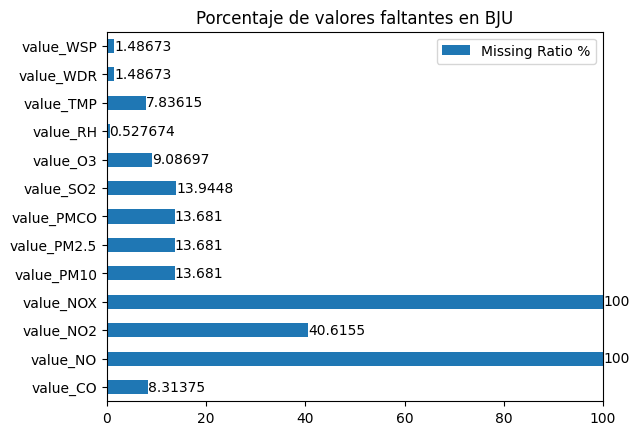

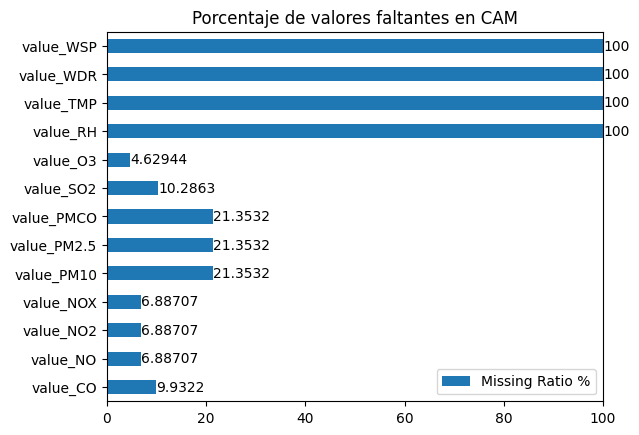

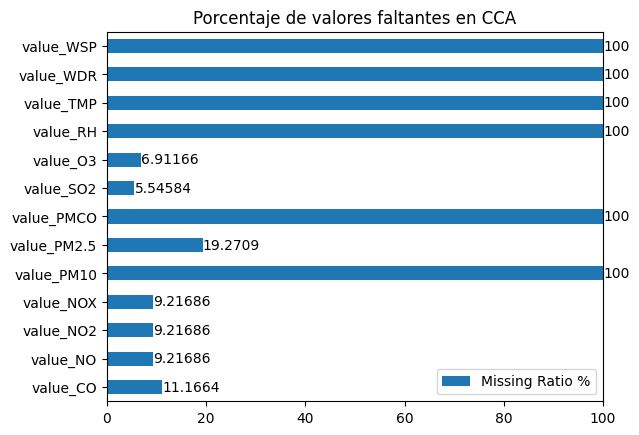

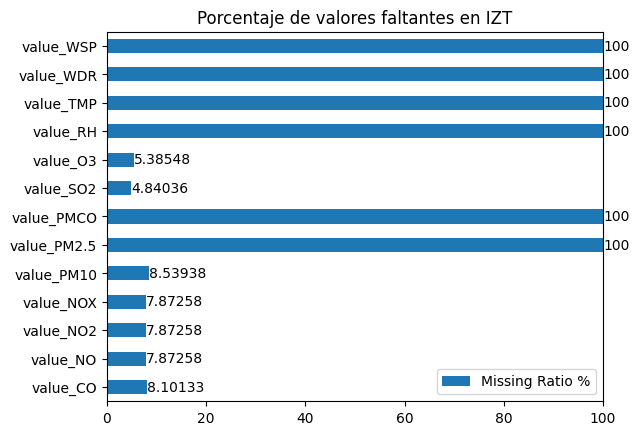

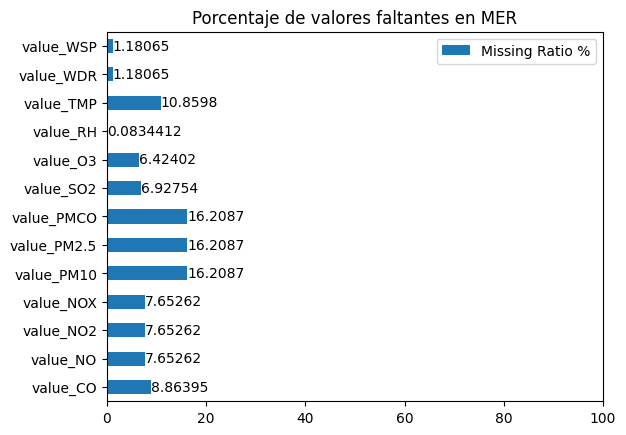

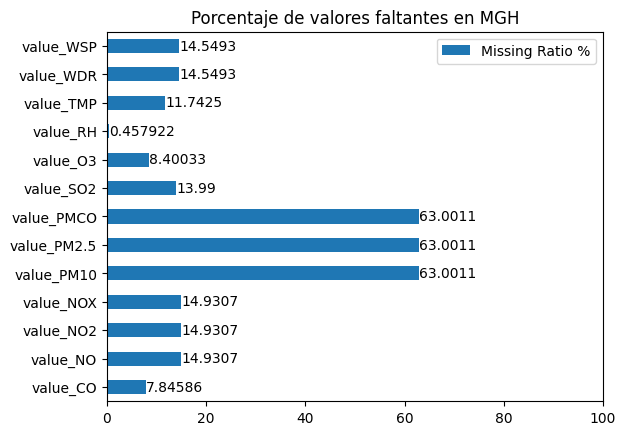

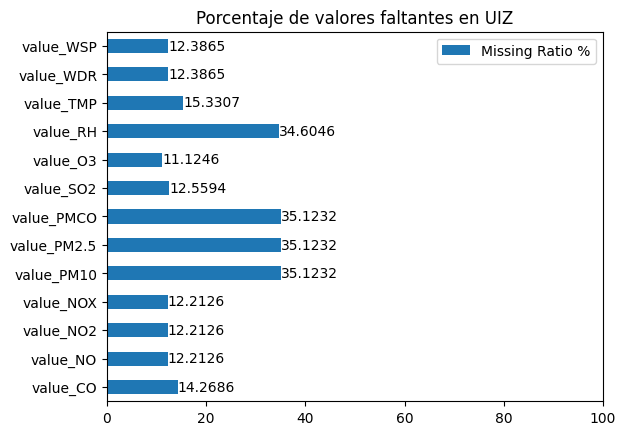

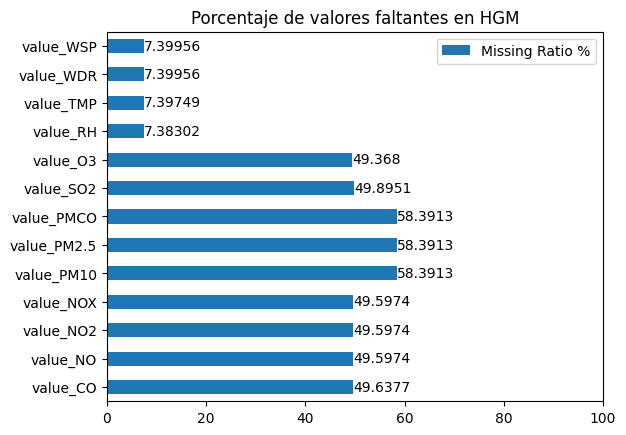

In [18]:
for i in df.id_station.unique():  
  temp = df.loc[df['id_station'] == i].iloc[:,2:]
  missing_values = ((temp.isna().sum()[df.isna().sum()>0])/len(temp))*100
  #print(missing_values)
  missing_data = pd.DataFrame({'Missing Ratio %' :missing_values})  
  ax = missing_data.plot(kind = "barh", title="Porcentaje de valores faltantes en "+i)
  ax.bar_label(ax.containers[0]) 
  plt.xlim(0,100)
  plt.show()

Debido a la ausencia de las mediciones de las variables meteorológicas en las estaciones en las estaciones con siglas IZT, CCA y CAM no se toman en consideración en el estudio

In [19]:
df = df[(df.id_station != 'IZT')&(df.id_station != 'CCA')&(df.id_station != 'CAM')]
temp_station = pd.DataFrame(df.id_station.unique(),columns=["Estaciones"])
temp_station.head(30)

,Estaciones
0,BJU
1,MER
2,MGH
3,UIZ
4,HGM


In [20]:
df = df.astype({'id_station':'string'})
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506066 entries, 3 to 2979682
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         506066 non-null  datetime64[ns]
 1   id_station   506066 non-null  string        
 2   value_CO     418176 non-null  float64       
 3   value_NO     318835 non-null  float64       
 4   value_NO2    380507 non-null  float64       
 5   value_NOX    318835 non-null  float64       
 6   value_PM10   318636 non-null  float64       
 7   value_PM2.5  318636 non-null  float64       
 8   value_PMCO   318636 non-null  float64       
 9   value_SO2    409322 non-null  float64       
 10  value_O3     422635 non-null  float64       
 11  value_RH     464382 non-null  float64       
 12  value_TMP    452356 non-null  float64       
 13  value_WDR    468948 non-null  float64       
 14  value_WSP    468948 non-null  float64       
dtypes: datetime64[ns](1), float64(13)

In [21]:
def missing_value_lineplot():
    months = ["01","02","03","04","05","06","07","08","09","10","11","12"]
    year = ["2017","2018","2019","2020","2021","2022"]
    variable = ['value_CO', 'value_NO', 'value_NO2', 'value_NOX', 'value_O3', 'value_PM10', 'value_PM2.5','value_PMCO', 'value_RH', 'value_TMP', 'value_WDR', 'value_WSP']
    missing_dict = dict()
    missing_df = pd.DataFrame(columns=["date","station","variable","missing-values"])     
    for i in df.id_station.unique():     
        for j in variable:
            for k in year:
                for l in range(12):                          
                    if months[l] == "02" and year !=2020:
                        mask_month = (df['date'] >= str(k)+"-"+months[l]+"-01 00:00:00")&(df['date'] <= str(k)+"-"+months[l]+"-28 00:00:00")
                    elif months[l]=="02" and year ==2020:
                        mask_month = (df['date'] >= str(k)+"-"+months[l]+"-01 00:00:00")&(df['date'] <= str(k)+"-"+months[l]+"-28 00:00:00")
                    elif months[l] in ["04","06","09","11"]:
                        mask_month = (df['date'] >= str(k)+"-"+months[l]+"-01 00:00:00")&(df['date'] <= str(k)+"-"+months[l]+"-30 00:00:00")
                    else:
                        mask_month = (df['date'] >= str(k)+"-"+months[l]+"-01 00:00:00")&(df['date'] <= str(k)+"-"+months[l]+"-31 00:00:00")
                    temp = df.loc[(mask_month)&(df['id_station']==i)][j]
                    #print(temp.isna().sum()/len(temp)*100)                    
                    miss_porc = (((temp.isna().sum())/len(temp))*100)
                    missing_df.loc[len(missing_df.index)] = [k+"-"+months[l], i, j,miss_porc]
    return missing_df

In [22]:
missing_per_month = missing_value_lineplot()

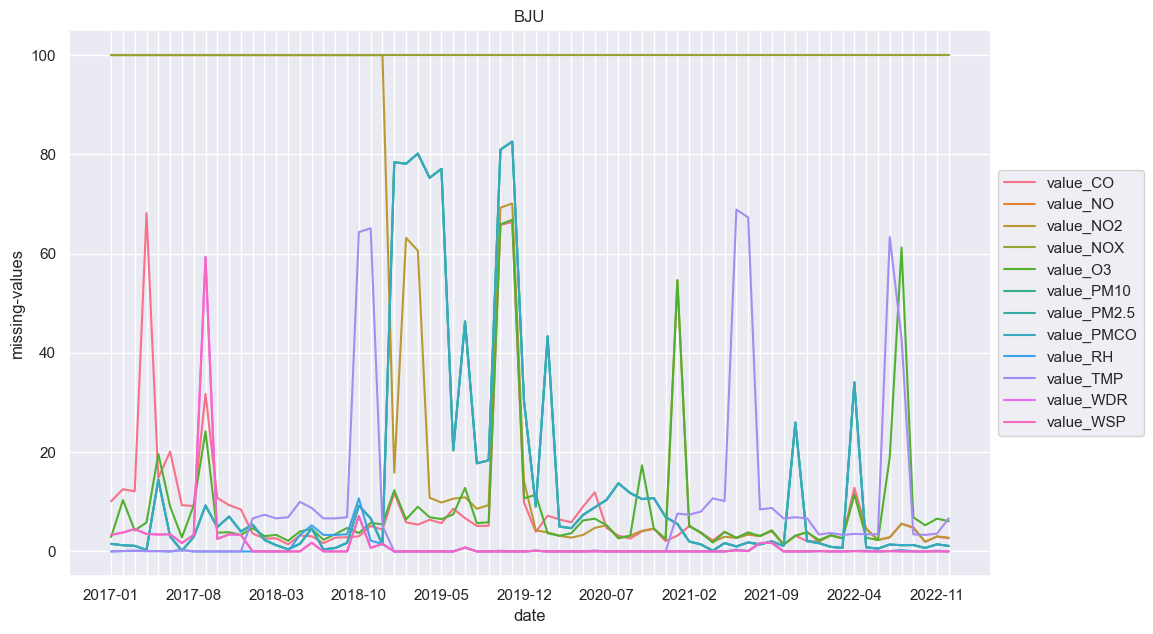

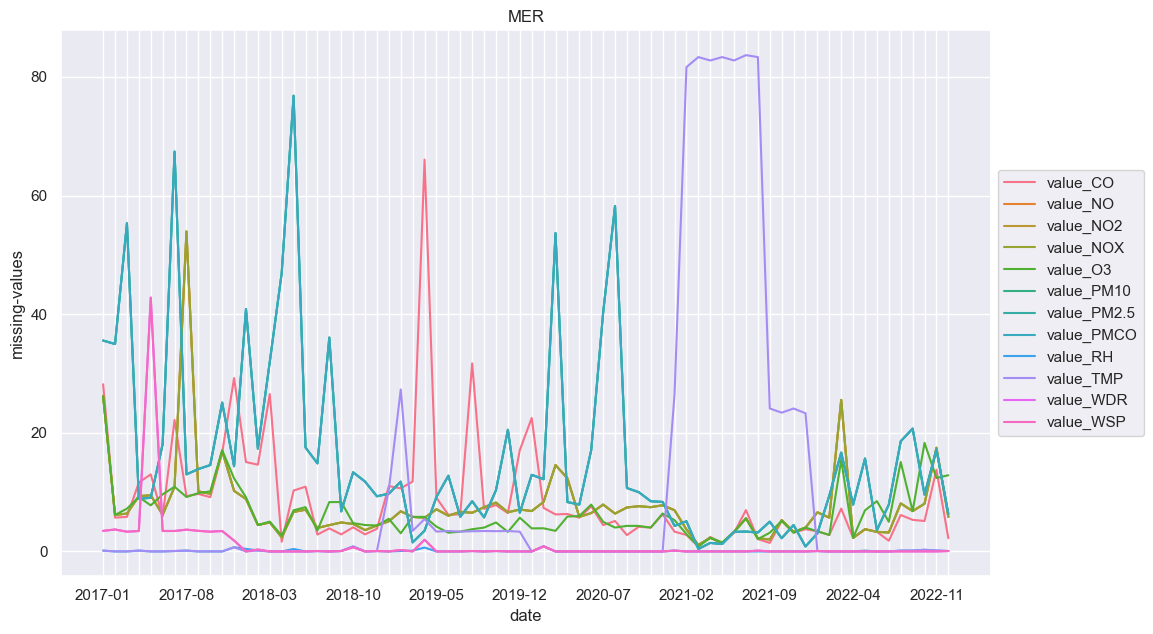

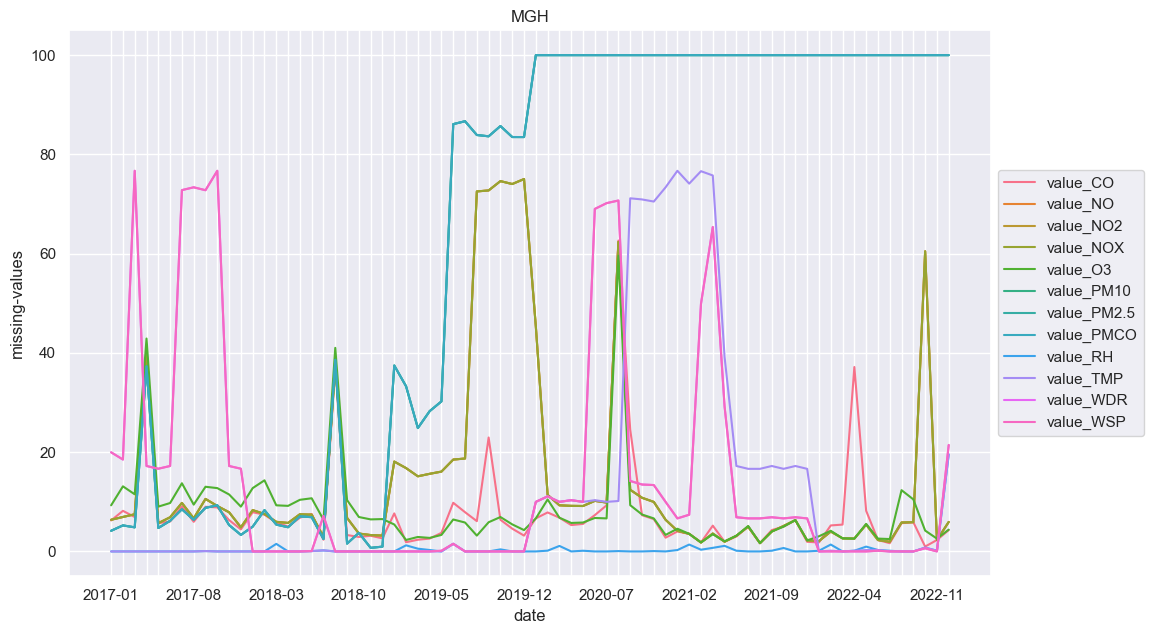

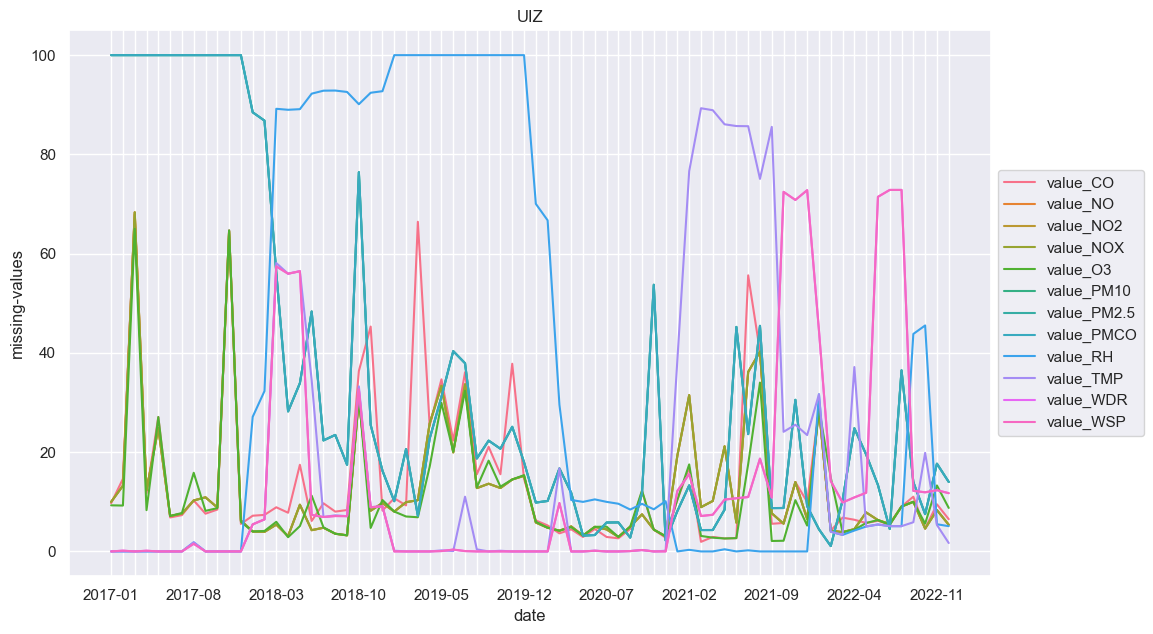

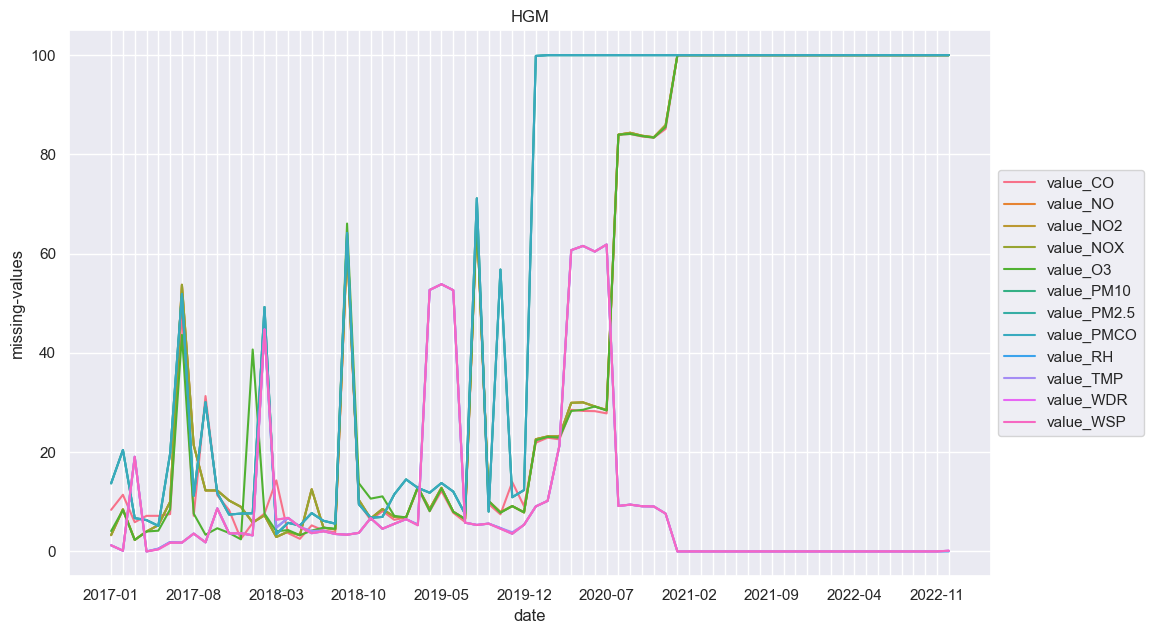

In [23]:
for i in missing_per_month['station'].unique():    
    plt.rcParams["figure.autolayout"] = True
    temp = missing_per_month.loc[missing_per_month['station']==i]
    sns.set(rc={'figure.figsize':(11.7,6.50)})
    ax = sns.lineplot(data=temp,x="date",y="missing-values",hue="variable")
    ax.set(title=i)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 7 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    plt.show()

# GAIN


In [24]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm

# coding=utf-8
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

'''Utility functions for GAIN.

(1) normalization: MinMax Normalizer
(2) renormalization: Recover the data from normalized data
(3) rounding: Handle categorical variables after imputation
(4) rmse_loss: Evaluate imputed data in terms of RMSE
(5) xavier_init: Xavier initialization
(6) binary_sampler: sample binary random variables
(7) uniform_sampler: sample uniform random variables
(8) sample_batch_index: sample random batch index
'''
 

#tf.disable_v2_behavior()


def normalization (data, parameters=None):
  '''Normalize data in [0, 1] range.
  
  Args:
    - data: original data
  
  Returns:
    - norm_data: normalized data
    - norm_parameters: min_val, max_val for each feature for renormalization
  '''

  # Parameters
  _, dim = data.shape
  norm_data = data.copy()
  
  if parameters is None:
  
    # MixMax normalization
    min_val = np.zeros(dim)
    max_val = np.zeros(dim)
    
    # For each dimension
    for i in range(dim):
      min_val[i] = np.nanmin(norm_data[:,i])
      norm_data[:,i] = norm_data[:,i] - np.nanmin(norm_data[:,i])
      max_val[i] = np.nanmax(norm_data[:,i])
      norm_data[:,i] = norm_data[:,i] / (np.nanmax(norm_data[:,i]) + 1e-6)   
      
    # Return norm_parameters for renormalization
    norm_parameters = {'min_val': min_val,
                       'max_val': max_val}

  else:
    min_val = parameters['min_val']
    max_val = parameters['max_val']
    
    # For each dimension
    for i in range(dim):
      norm_data[:,i] = norm_data[:,i] - min_val[i]
      norm_data[:,i] = norm_data[:,i] / (max_val[i] + 1e-6)  
      
    norm_parameters = parameters    
      
  return norm_data, norm_parameters


def renormalization (norm_data, norm_parameters):
  '''Renormalize data from [0, 1] range to the original range.
  
  Args:
    - norm_data: normalized data
    - norm_parameters: min_val, max_val for each feature for renormalization
  
  Returns:
    - renorm_data: renormalized original data
  '''
  
  min_val = norm_parameters['min_val']
  max_val = norm_parameters['max_val']

  _, dim = norm_data.shape
  renorm_data = norm_data.copy()
    
  for i in range(dim):
    renorm_data[:,i] = renorm_data[:,i] * (max_val[i] + 1e-6)   
    renorm_data[:,i] = renorm_data[:,i] + min_val[i]
    
  return renorm_data


def rounding (imputed_data, data_x):
  '''Round imputed data for categorical variables.
  
  Args:
    - imputed_data: imputed data
    - data_x: original data with missing values
    
  Returns:
    - rounded_data: rounded imputed data
  '''
  
  _, dim = data_x.shape
  rounded_data = imputed_data.copy()
  
  for i in range(dim):
    temp = data_x[~np.isnan(data_x[:, i]), i]
    # Only for the categorical variable
    if len(np.unique(temp)) < 20:
      rounded_data[:, i] = np.round(rounded_data[:, i])
      
  return rounded_data


def rmse_loss (ori_data, imputed_data, data_m):
  '''Compute RMSE loss between ori_data and imputed_data
  
  Args:
    - ori_data: original data without missing values
    - imputed_data: imputed data
    - data_m: indicator matrix for missingness
    
  Returns:
    - rmse: Root Mean Squared Error
  '''
  
  ori_data, norm_parameters = normalization(ori_data)
  imputed_data, _ = normalization(imputed_data, norm_parameters)
    
  # Only for missing values
  nominator = np.nansum(((1-data_m) * ori_data - (1-data_m) * imputed_data)**2)
  denominator = np.sum(1-data_m)
  
  rmse = np.sqrt(nominator/float(denominator))
  
  return rmse


def xavier_init(size):
  '''Xavier initialization.
  
  Args:
    - size: vector size
    
  Returns:
    - initialized random vector.
  '''
  in_dim = size[0]
  xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
  return tf.random_normal(shape = size, stddev = xavier_stddev)
      

def binary_sampler(p, rows, cols):
  '''Sample binary random variables.
  
  Args:
    - p: probability of 1
    - rows: the number of rows
    - cols: the number of columns
    
  Returns:
    - binary_random_matrix: generated binary random matrix.
  '''
  unif_random_matrix = np.random.uniform(0., 1., size = [rows, cols])
  binary_random_matrix = 1*(unif_random_matrix < p)
  return binary_random_matrix


def uniform_sampler(low, high, rows, cols):
  '''Sample uniform random variables.
  
  Args:
    - low: low limit
    - high: high limit
    - rows: the number of rows
    - cols: the number of columns
    
  Returns:
    - uniform_random_matrix: generated uniform random matrix.
  '''
  return np.random.uniform(low, high, size = [rows, cols])       


def sample_batch_index(total, batch_size):
  '''Sample index of the mini-batch.
  
  Args:
    - total: total number of samples
    - batch_size: batch size
    
  Returns:
    - batch_idx: batch index
  '''
  total_idx = np.random.permutation(total)
  batch_idx = total_idx[:batch_size]
  return batch_idx
  

  


In [25]:

# coding=utf-8
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

'''GAIN function.
Date: 2020/02/28
Reference: J. Yoon, J. Jordon, M. van der Schaar, "GAIN: Missing Data 
           Imputation using Generative Adversarial Nets," ICML, 2018.
Paper Link: http://proceedings.mlr.press/v80/yoon18a/yoon18a.pdf
Contact: jsyoon0823@gmail.com
'''

# Necessary packages
# import tensorflow as tf
# IF USING TF 2 use following import to still use TF < 2.0 Functionalities
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.disable_v2_behavior()

from tqdm import tqdm



def gain (data_x, gain_parameters):
  '''Impute missing values in data_x
  
  Args:
    - data_x: original data with missing values
    - gain_parameters: GAIN network parameters:
      - batch_size: Batch size
      - hint_rate: Hint rate
      - alpha: Hyperparameter
      - iterations: Iterations
      
  Returns:
    - imputed_data: imputed data
  '''
  # Define mask matrix
  data_m = 1-np.isnan(data_x)
  
  # System parameters
  batch_size = gain_parameters['batch_size']
  hint_rate = gain_parameters['hint_rate']
  alpha = gain_parameters['alpha']
  iterations = gain_parameters['iterations']
  
  # Other parameters
  no, dim = data_x.shape
  
  # Hidden state dimensions
  h_dim = int(dim)
  
  # Normalization
  norm_data, norm_parameters = normalization(data_x)
  norm_data_x = np.nan_to_num(norm_data, 0)
  
  ## GAIN architecture   
  # Input placeholders
  # Data vector
  X = tf.placeholder(tf.float32, shape = [None, dim])
  # Mask vector 
  M = tf.placeholder(tf.float32, shape = [None, dim])
  # Hint vector
  H = tf.placeholder(tf.float32, shape = [None, dim])
  
  # Discriminator variables
  D_W1 = tf.Variable(xavier_init([dim*2, h_dim])) # Data + Hint as inputs
  D_b1 = tf.Variable(tf.zeros(shape = [h_dim]))
  
  D_W2 = tf.Variable(xavier_init([h_dim, h_dim]))
  D_b2 = tf.Variable(tf.zeros(shape = [h_dim]))
  
  D_W3 = tf.Variable(xavier_init([h_dim, dim]))
  D_b3 = tf.Variable(tf.zeros(shape = [dim]))  # Multi-variate outputs
  
  theta_D = [D_W1, D_W2, D_W3, D_b1, D_b2, D_b3]
  
  #Generator variables
  # Data + Mask as inputs (Random noise is in missing components)
  G_W1 = tf.Variable(xavier_init([dim*2, h_dim]))  
  G_b1 = tf.Variable(tf.zeros(shape = [h_dim]))
  
  G_W2 = tf.Variable(xavier_init([h_dim, h_dim]))
  G_b2 = tf.Variable(tf.zeros(shape = [h_dim]))
  
  G_W3 = tf.Variable(xavier_init([h_dim, dim]))
  G_b3 = tf.Variable(tf.zeros(shape = [dim]))
  
  theta_G = [G_W1, G_W2, G_W3, G_b1, G_b2, G_b3]
  
  ## GAIN functions
  # Generator
  def generator(x,m):
    # Concatenate Mask and Data
    inputs = tf.concat(values = [x, m], axis = 1) 
    G_h1 = tf.nn.relu(tf.matmul(inputs, G_W1) + G_b1)
    G_h2 = tf.nn.relu(tf.matmul(G_h1, G_W2) + G_b2)   
    # MinMax normalized output
    G_prob = tf.nn.sigmoid(tf.matmul(G_h2, G_W3) + G_b3) 
    return G_prob
      
  # Discriminator
  def discriminator(x, h):
    # Concatenate Data and Hint
    inputs = tf.concat(values = [x, h], axis = 1) 
    D_h1 = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)  
    D_h2 = tf.nn.relu(tf.matmul(D_h1, D_W2) + D_b2)
    D_logit = tf.matmul(D_h2, D_W3) + D_b3
    D_prob = tf.nn.sigmoid(D_logit)
    return D_prob
  
  ## GAIN structure
  # Generator
  G_sample = generator(X, M)
 
  # Combine with observed data
  Hat_X = X * M + G_sample * (1-M)
  
  # Discriminator
  D_prob = discriminator(Hat_X, H)
  
  ## GAIN loss
  D_loss_temp = -tf.reduce_mean(M * tf.log(D_prob + 1e-8) \
                                + (1-M) * tf.log(1. - D_prob + 1e-8)) 
  
  G_loss_temp = -tf.reduce_mean((1-M) * tf.log(D_prob + 1e-8))
  
  MSE_loss = \
  tf.reduce_mean((M * X - M * G_sample)**2) / tf.reduce_mean(M)
  
  D_loss = D_loss_temp
  G_loss = G_loss_temp + alpha * MSE_loss 
  
  ## GAIN solver
  D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
  G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)
  
  ## Iterations
  sess = tf.Session()
  sess.run(tf.global_variables_initializer())

  
   
  # Start Iterations
  for it in tqdm(range(iterations)):    
      
    # Sample batch
    batch_idx = sample_batch_index(no, batch_size)
    X_mb = norm_data_x[batch_idx, :]  
    M_mb = data_m[batch_idx, :]  
    # Sample random vectors  
    Z_mb = uniform_sampler(0, 0.01, batch_size, dim) 
    # Sample hint vectors
    H_mb_temp = binary_sampler(hint_rate, batch_size, dim)
    H_mb = M_mb * H_mb_temp
      
    # Combine random vectors with observed vectors
    X_mb = M_mb * X_mb + (1-M_mb) * Z_mb 
      
    _, D_loss_curr = sess.run([D_solver, D_loss_temp], 
                              feed_dict = {M: M_mb, X: X_mb, H: H_mb})
    _, G_loss_curr, MSE_loss_curr = \
    sess.run([G_solver, G_loss_temp, MSE_loss],
             feed_dict = {X: X_mb, M: M_mb, H: H_mb})
    
            
  ## Return imputed data      
  Z_mb = uniform_sampler(0, 0.01, no, dim) 
  M_mb = data_m
  X_mb = norm_data_x          
  X_mb = M_mb * X_mb + (1-M_mb) * Z_mb 
      
  imputed_data = sess.run([G_sample], feed_dict = {X: X_mb, M: M_mb})[0]
  
  imputed_data = data_m * norm_data_x + (1-data_m) * imputed_data
  
  # Renormalization
  imputed_data = renormalization(imputed_data, norm_parameters)  
  
  # Rounding
  imputed_data = rounding(imputed_data, data_x)  
          
  return imputed_data


Instructions for updating:
non-resource variables are not supported in the long term


In [26]:
gain_parameters = {'batch_size': 128,
                     'hint_rate': 1,
                     'alpha': 100,
                     'iterations': 100000}

# MER

In [27]:
mer_df = df[df['id_station']=='MER']
mer_df.head()

,date,id_station,value_CO,value_NO,value_NO2,value_NOX,value_PM10,value_PM2.5,value_PMCO,value_SO2,value_O3,value_RH,value_TMP,value_WDR,value_WSP
22,2017-01-01 00:00:00,MER,1.3,22.0,47.0,69.0,73.0,46.0,27.0,5.0,3.0,63.0,14.4,205.0,0.8
23,2017-01-01 00:00:00,MER,1.3,22.0,47.0,69.0,73.0,46.0,27.0,5.0,3.0,63.0,14.4,205.0,0.8
71,2017-01-01 01:00:00,MER,1.3,18.0,45.0,62.0,105.0,73.0,32.0,6.0,1.0,67.0,13.7,144.0,0.8
72,2017-01-01 01:00:00,MER,1.3,18.0,45.0,62.0,105.0,73.0,32.0,6.0,1.0,67.0,13.7,144.0,0.8
124,2017-01-01 02:00:00,MER,1.2,11.0,41.0,52.0,103.0,74.0,29.0,5.0,2.0,66.0,13.6,164.0,0.5


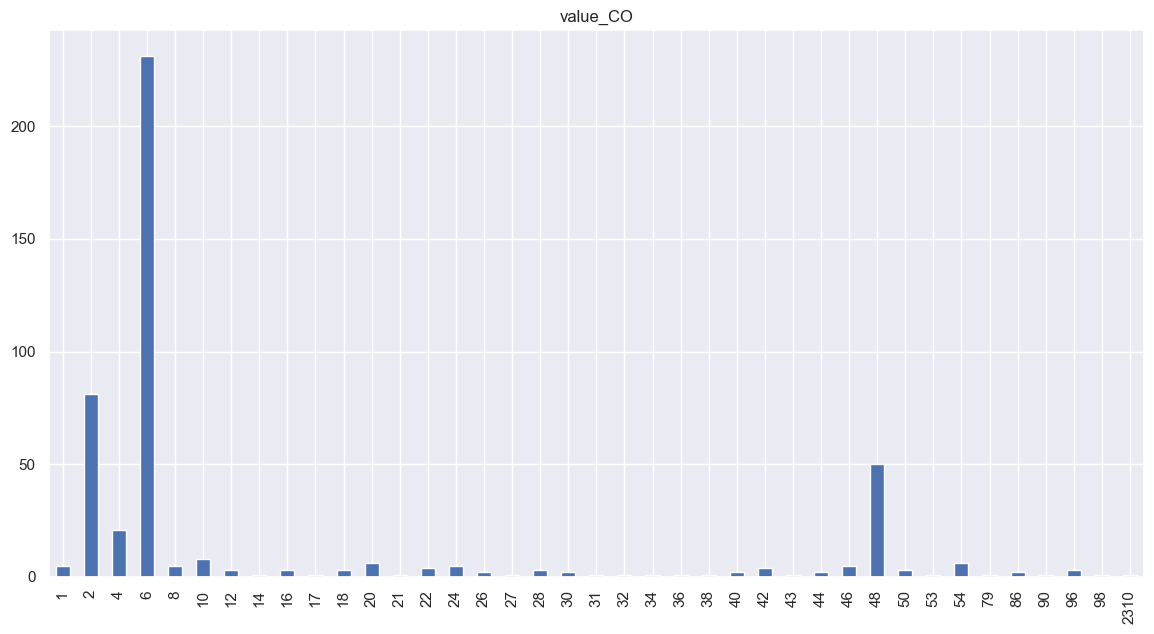

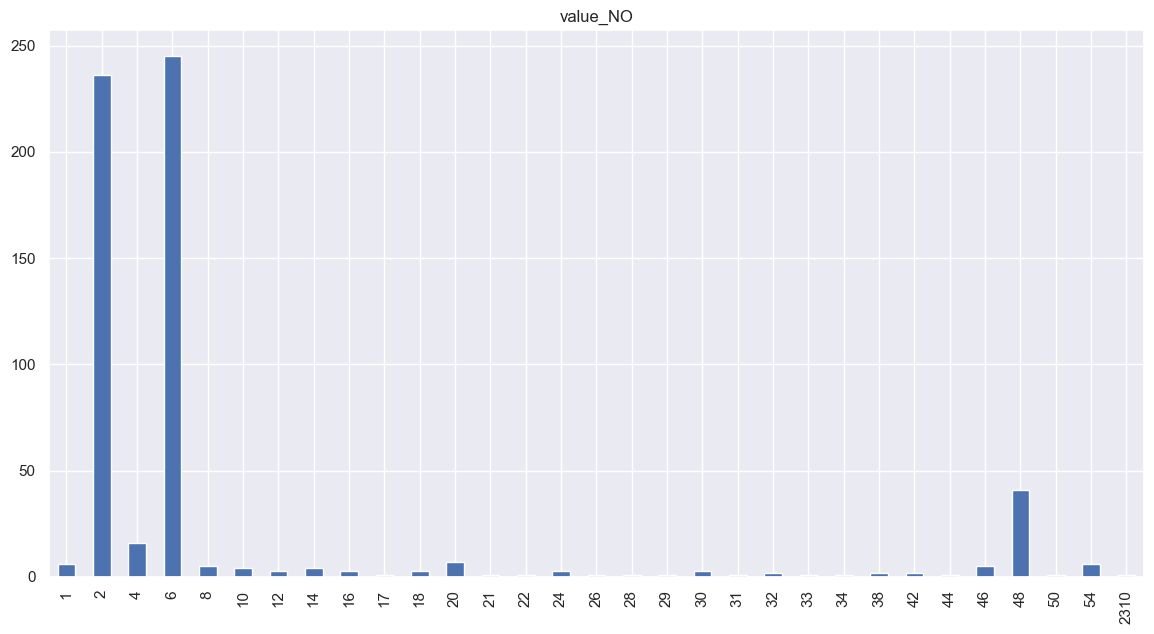

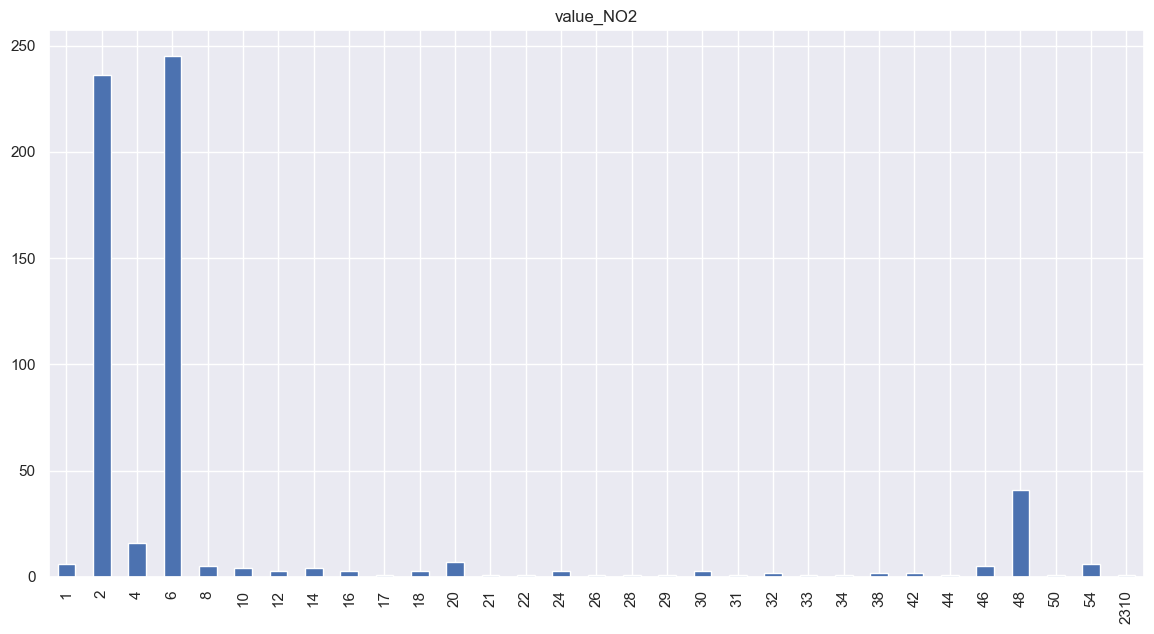

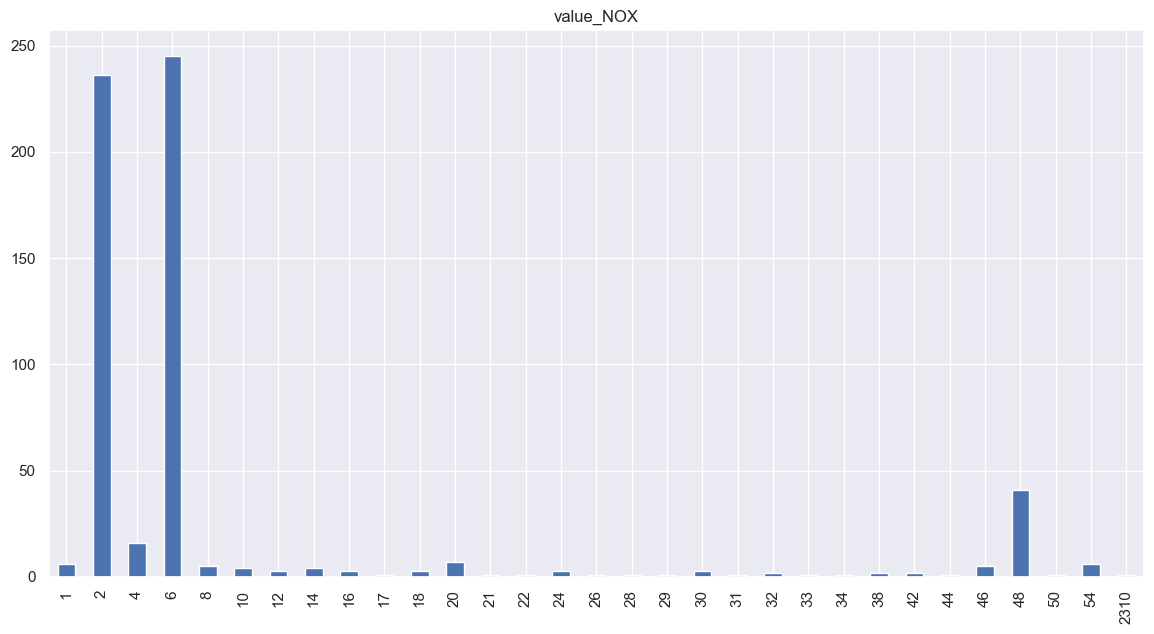

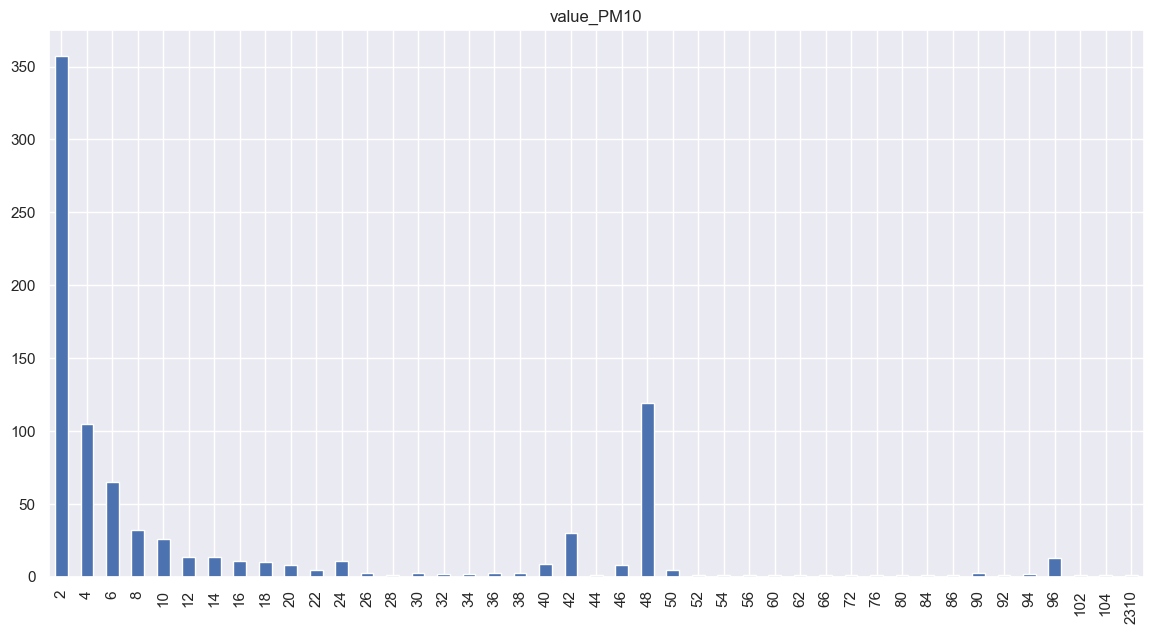

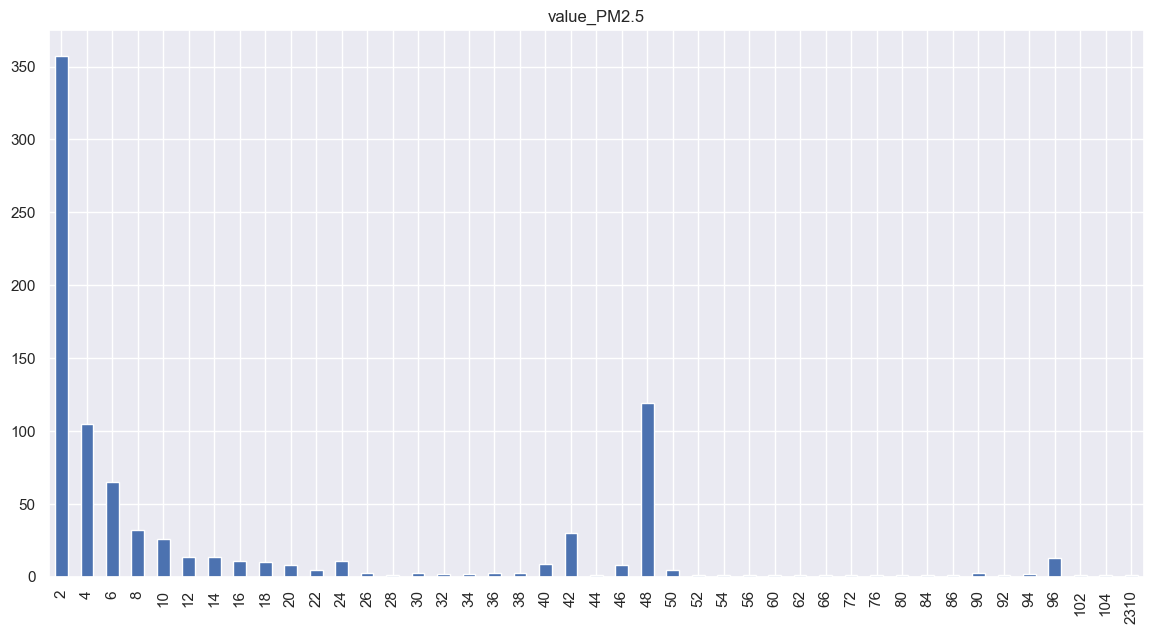

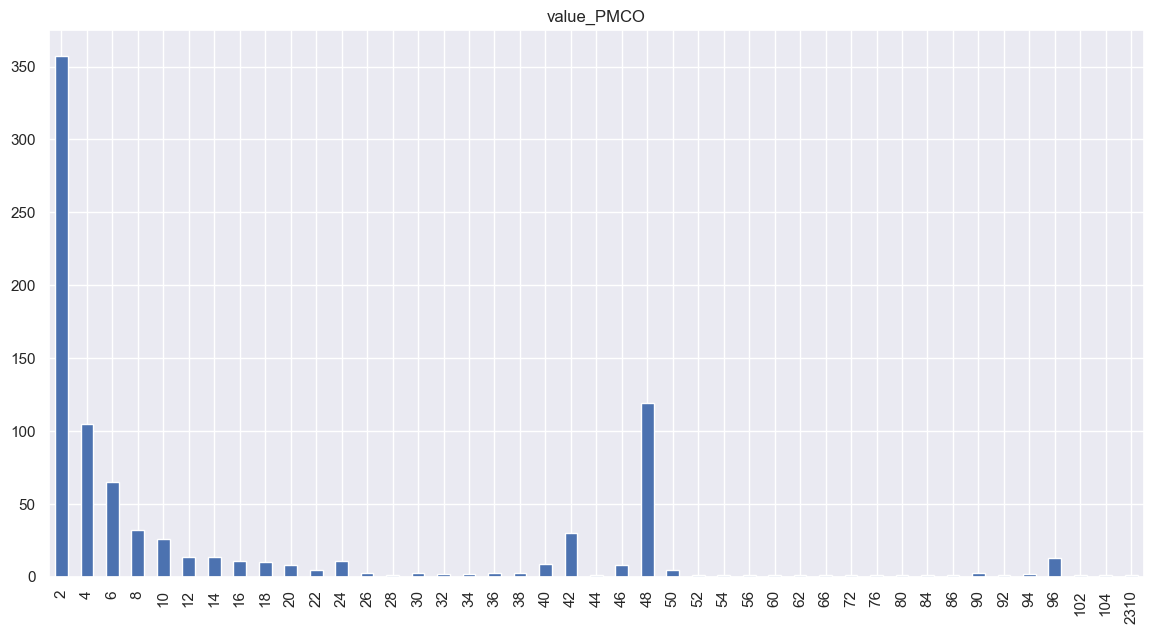

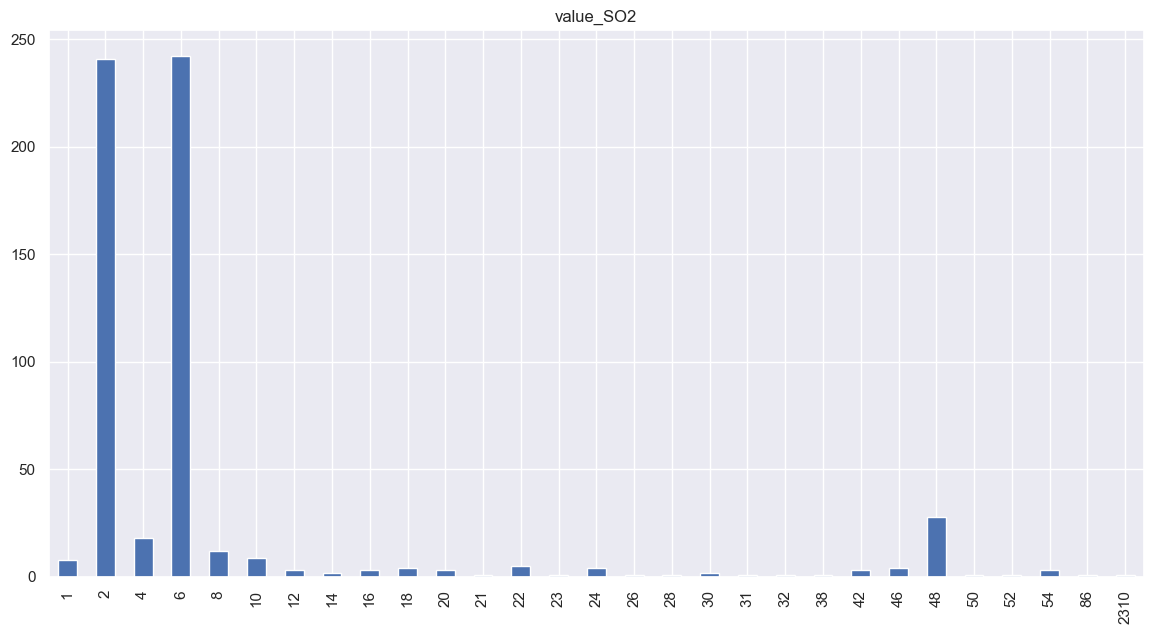

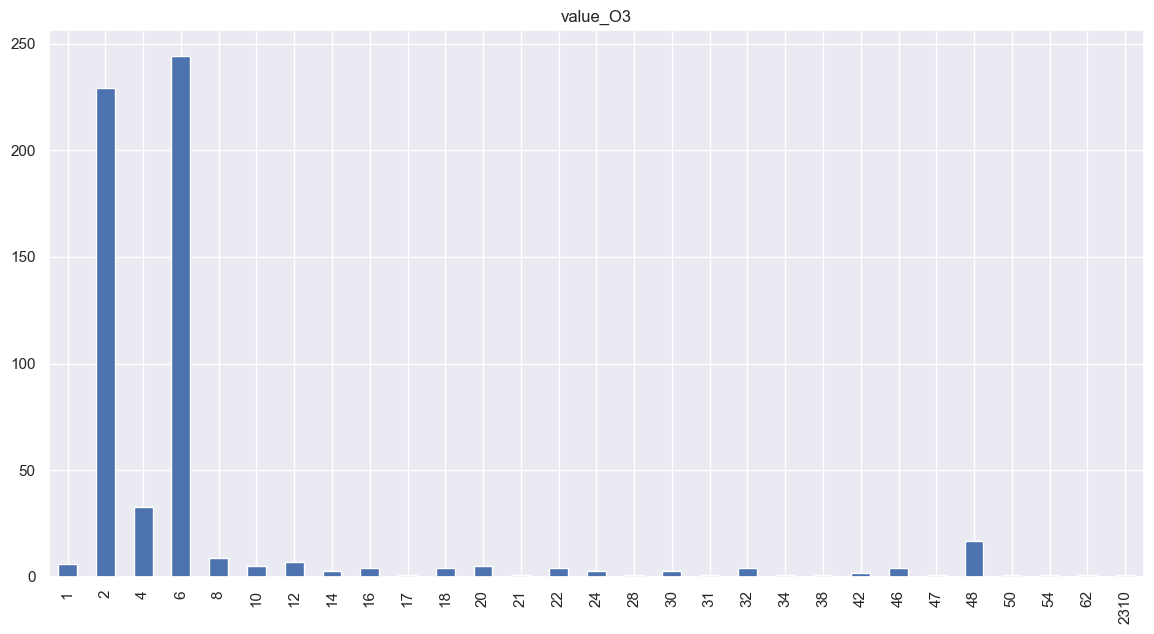

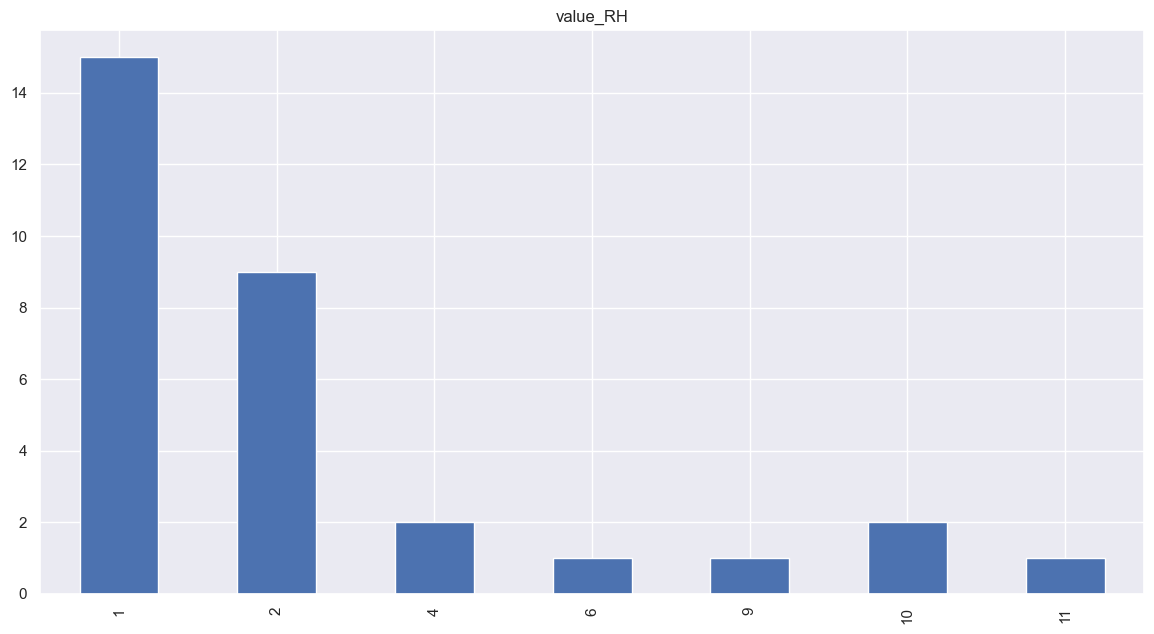

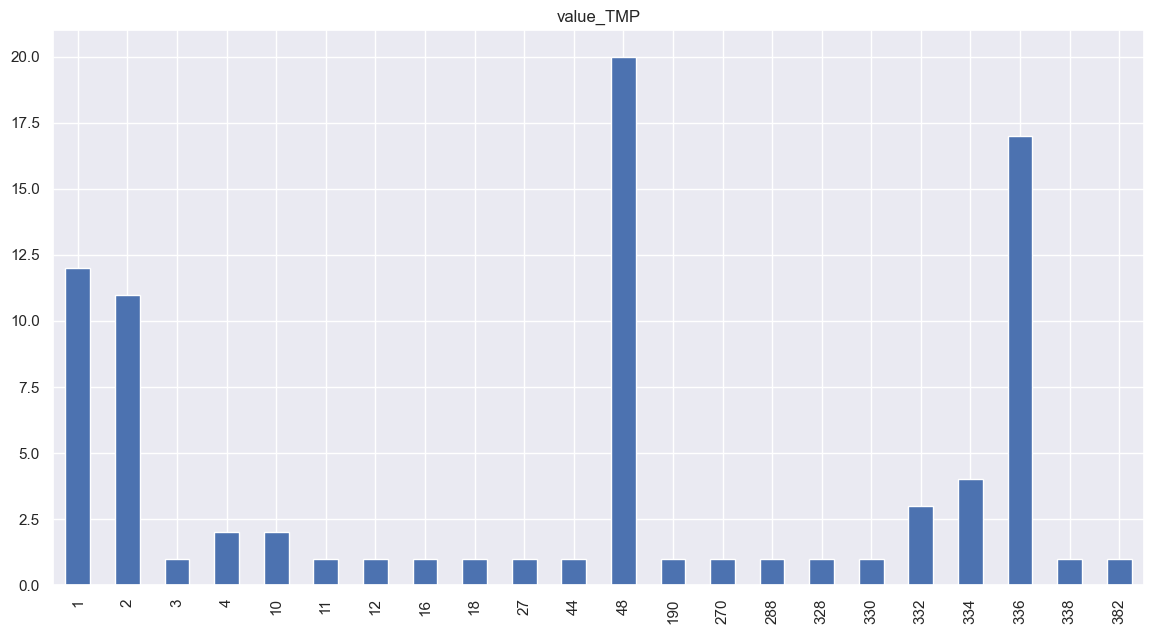

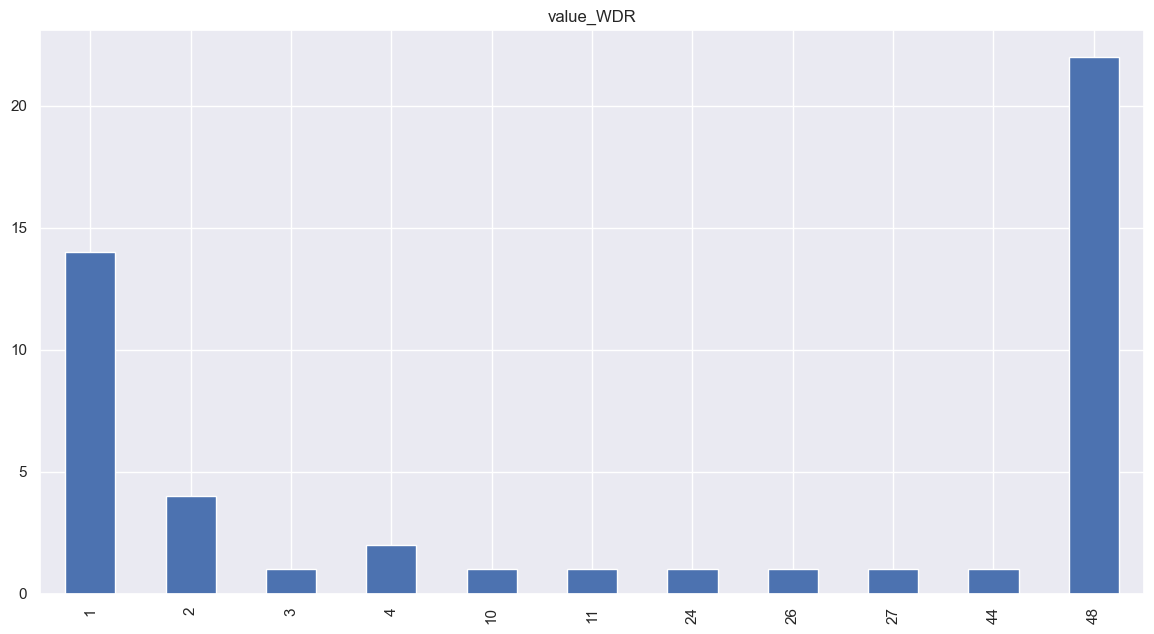

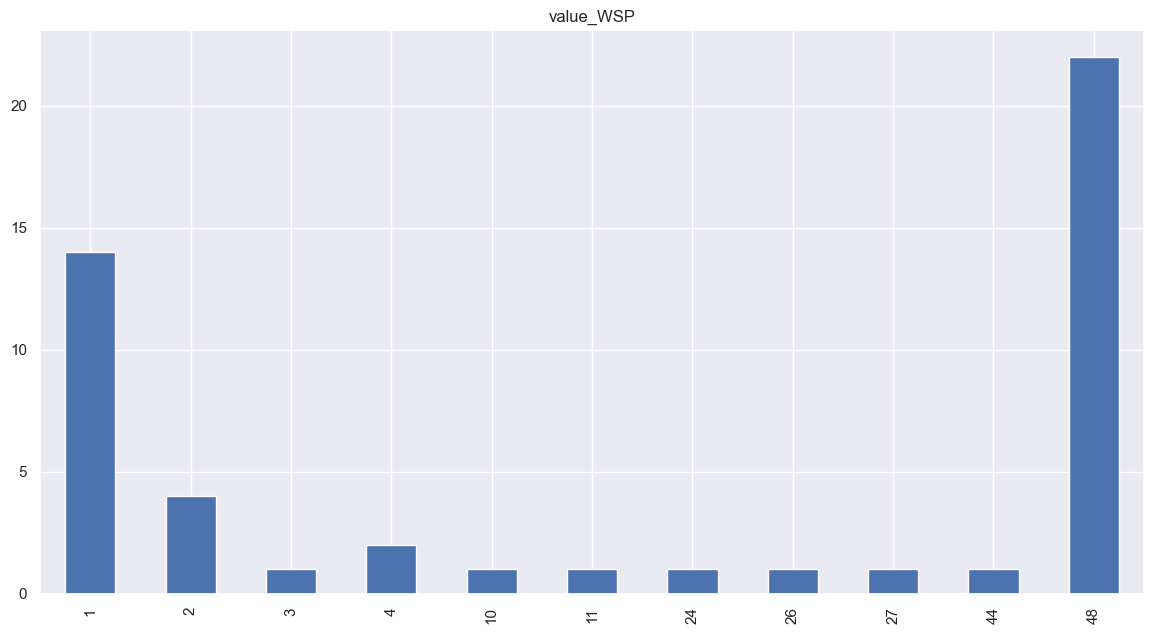

In [28]:
for i in mer_df.iloc[:,2:].columns:
  mask = mer_df[i].isna()
  d = mer_df.index.to_series()[mask].groupby((~mask).cumsum()[mask]).agg(['first', 'size'])
  d.rename(columns=dict(size='num of contig null', first='Start_Date')).reset_index(drop=True)
  a = d['size'].value_counts().sort_index(ascending=True)
  plt.title(i)
  a.plot.bar()
  plt.show()

In [29]:
df.id_station.unique()

<StringArray>
['BJU', 'MER', 'MGH', 'UIZ', 'HGM']
Length: 5, dtype: string

In [30]:
all_station_df = []
for j in df.id_station.unique():
  temp_station_df = df[df['id_station']==j]
  for i in temp_station_df.iloc[:,2:].columns:
    temp_df = temp_station_df[i].values
    temp_df = temp_df.reshape(temp_df.shape[0],1)
    temp_df_x = gain(temp_df,gain_parameters)
    a = temp_df_x.ravel()
    a = pd.Series(a)
    temp_station_df.loc[:,i] = a.values
  all_station_df.append(temp_station_df)

100%|██████████| 100000/100000 [04:53<00:00, 341.26it/s]
C:\Users\jjssi\AppData\Local\Temp\ipykernel_18360\2393413199.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_station_df.loc[:,i] = a.values
C:\Users\jjssi\AppData\Local\Temp\ipykernel_18360\1204889270.py:58: RuntimeWarning: All-NaN slice encountered
  min_val[i] = np.nanmin(norm_data[:,i])
C:\Users\jjssi\AppData\Local\Temp\ipykernel_18360\1204889270.py:59: RuntimeWarning: All-NaN slice encountered
  norm_data[:,i] = norm_data[:,i] - np.nanmin(norm_data[:,i])
C:\Users\jjssi\AppData\Local\Temp\ipykernel_18360\1204889270.py:60: RuntimeWarning: All-NaN slice encountered
  max_val[i] = np.nanmax(norm_data[:,i])
C:\Users\jjssi\AppData\Local\Temp\ipykernel_18360\1204889270.py:61: Runtime

In [32]:
for i in all_station_df:
    print(i.isna().sum().sum())

207704
0
0
0
0
